Paul Sentongo
Ogwok Kenneth
Marvin M
Comfort Agaba

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency 
import joblib

In [3]:
# Load datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
# Explore data using pandas and seaborn functions
train_data.head()  # View the first few rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [49]:
# Check for missing values
train_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [50]:
# Check for duplicates
train_data.duplicated().sum()

0

In [51]:
# Analyze data distribution (numerical features)
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Visualize data distribution (histograms, boxplots)

<Axes: >

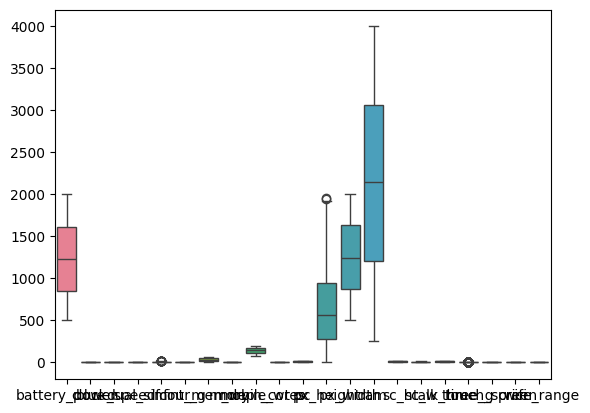

In [52]:
sns.boxplot(train_data)

<Axes: ylabel='Count'>

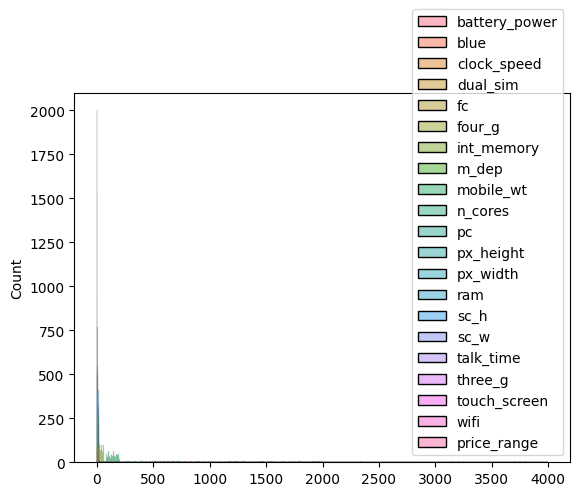

In [53]:
sns.histplot(train_data)

In [54]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Identify categorical and continuous variables

In [55]:
categorical_vars = train_data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
continuous_vars = train_data.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)

Categorical Variables: []
Continuous Variables: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [56]:

continuous_vars = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
Q1 = train_data[continuous_vars].quantile(0.25)
Q3 = train_data[continuous_vars].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((train_data[continuous_vars] < (Q1 - 1.5 * IQR)) | (train_data[continuous_vars] > (Q3 + 1.5 * IQR))).any(axis=1)
train_data[continuous_vars] = train_data[continuous_vars].apply(lambda x: winsorize(x, limits=[0.05, 0.05]))

<Axes: >

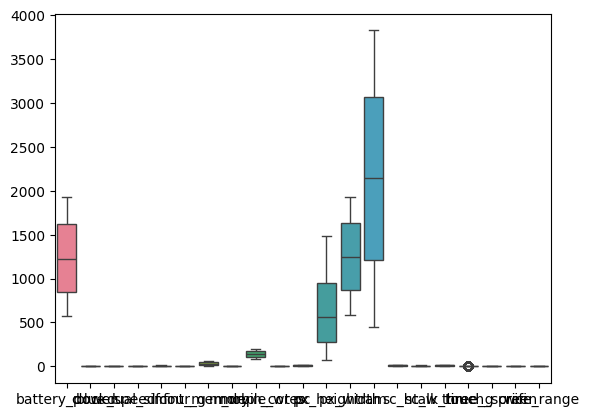

In [57]:
sns.boxplot(train_data)

In [58]:
# Analyze data types
train_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

#Analyze relationships between features (correlation matrix or heatmap)

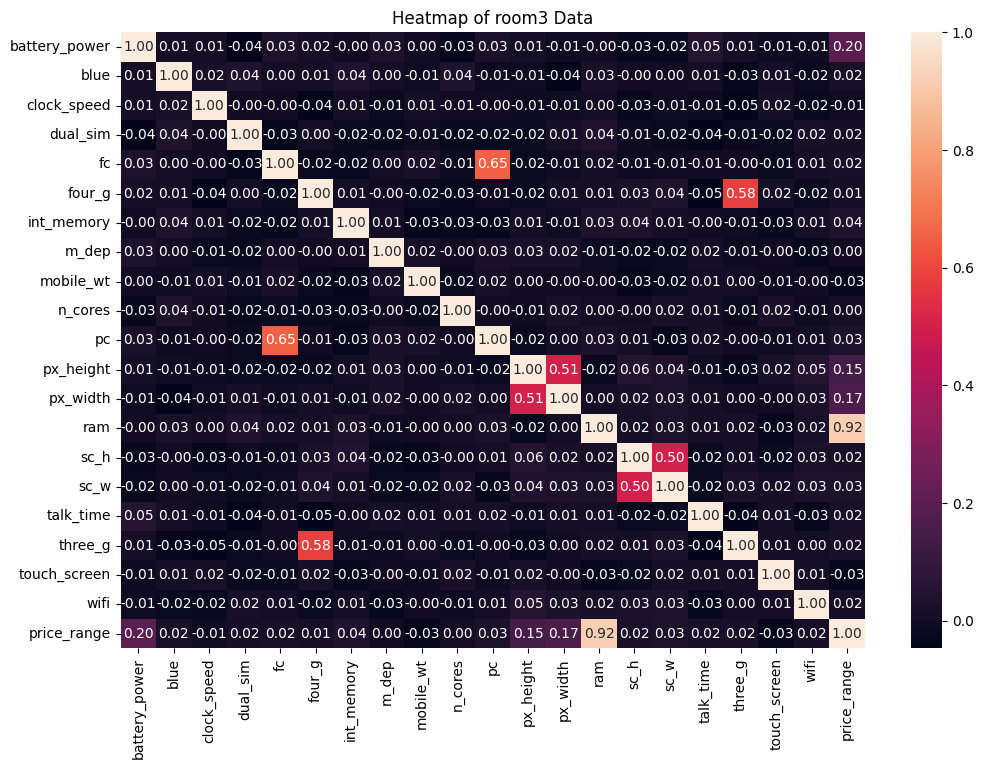

In [59]:
correlation = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title('Heatmap of room3 Data')
plt.show()

In [60]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Set up the matplotlib figure for numerical features

IndexError: index 20 is out of bounds for axis 0 with size 20

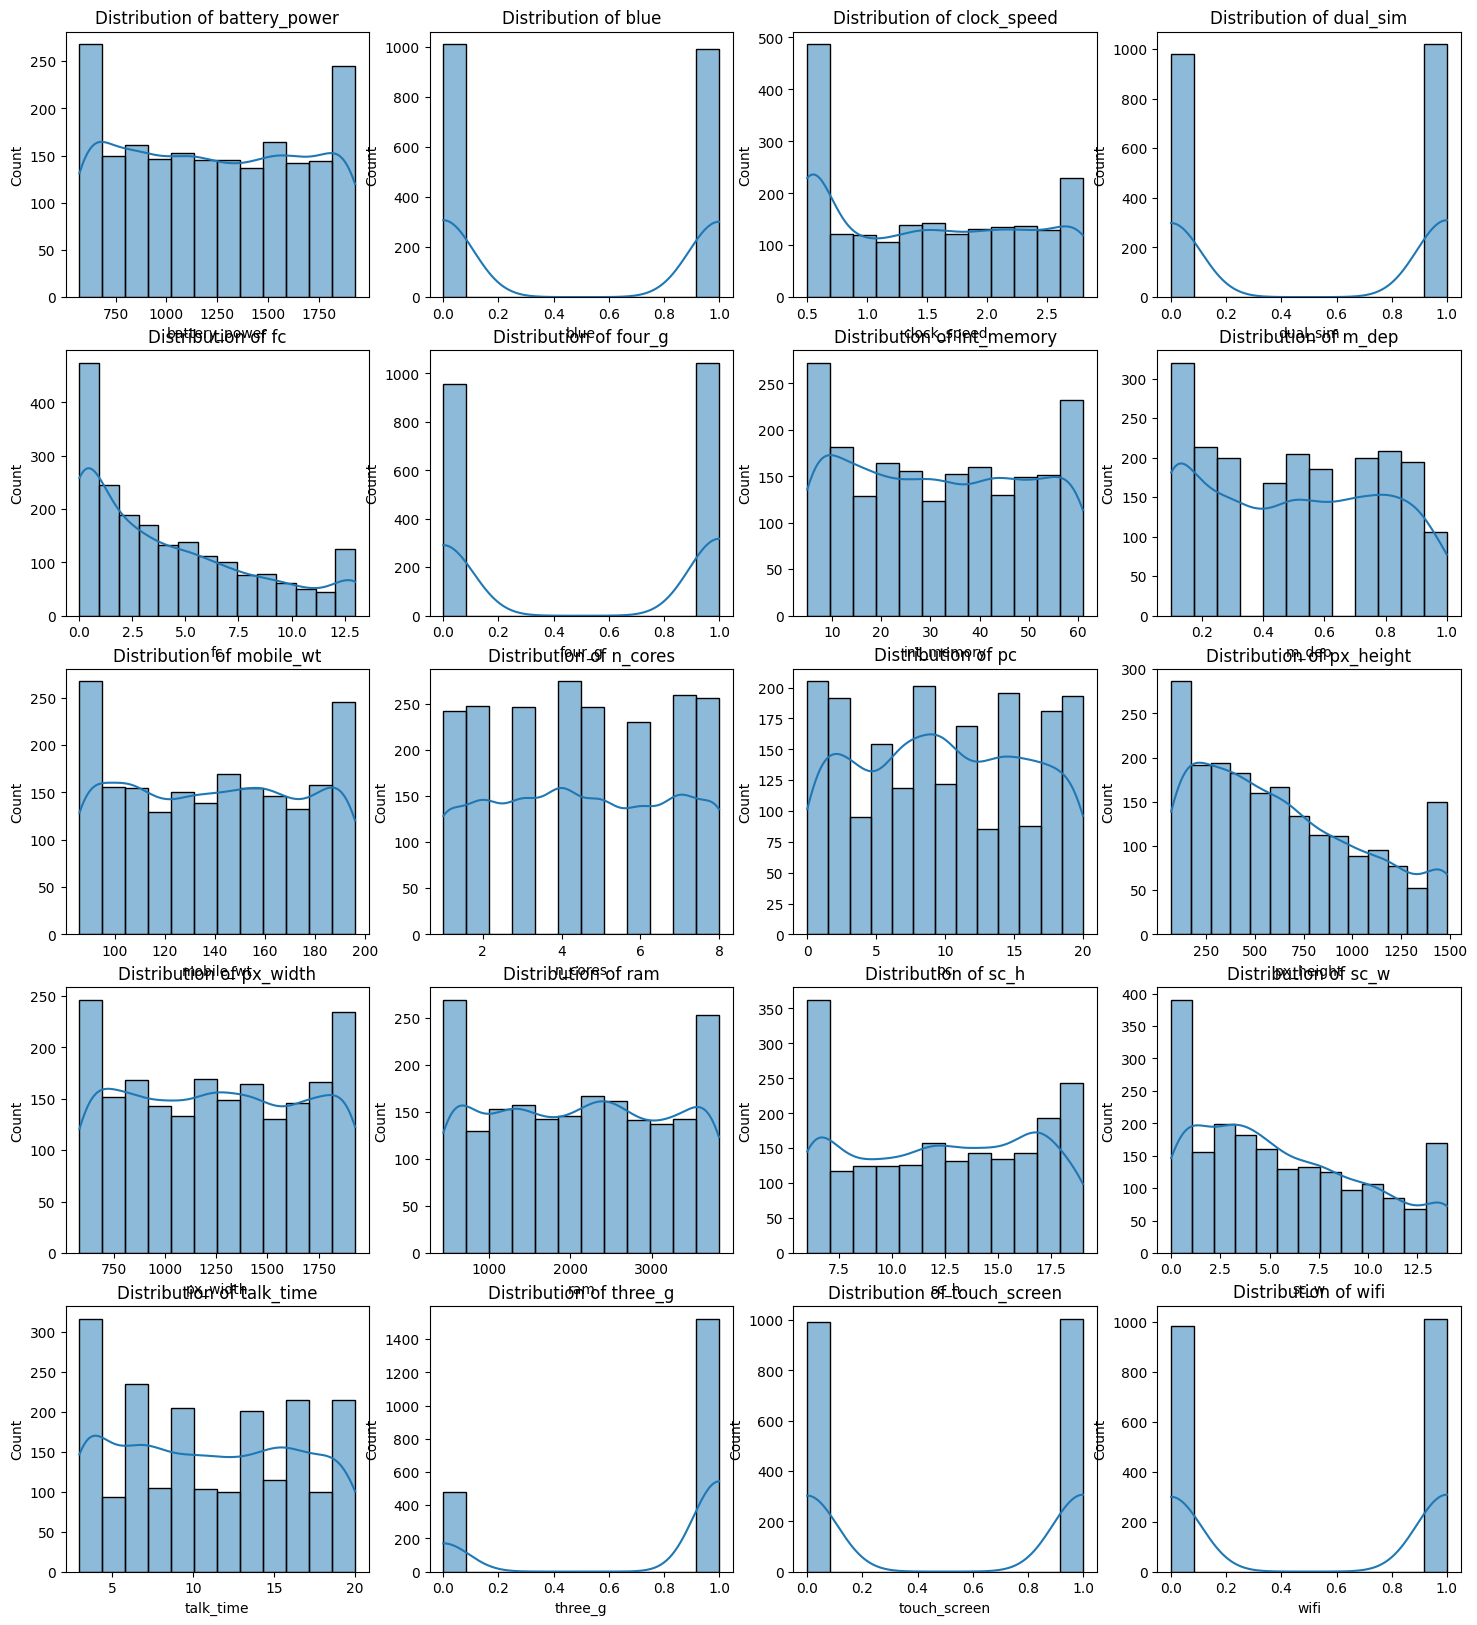

In [61]:


numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, col in enumerate(numerical_features):
    sns.histplot(train_data[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

continouns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc','int_memory', 'mobile_wt', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w']

Categorical = ['talk_time', 'three_g','touch_screen', 'wifi', 'price_range','n_cores','m_dep','four_g']
      

In [ ]:
from scipy.stats import f_oneway

# Assuming you have three or more columns to compare: 'group1', 'group2', 'group3'
f_stat, p_value = f_oneway(train_data['talk_time'], train_data['touch_screen'], train_data['price_range'])
print(f"F-statistic: {f_stat}, p-value: {p_value}")


F-statistic: 6681.658546744031, p-value: 0.0


In [64]:
from itertools import combinations
from scipy.stats import spearmanr

continouns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
              'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w']
categorical_var = ['price_range']  # Assuming you only have one categorical variable

# Assuming your DataFrame is called 'train_data'

for continuous_var in continouns:  # Loop through each continuous variable
  correlation_coeff, p_value = spearmanr(train_data[continuous_var], train_data[categorical_var[0]].astype('category').cat.codes)
  print(f"{continuous_var} vs. {categorical_var[0]} - Spearman's Rank Correlation: {correlation_coeff}, p-value: {p_value}")



battery_power vs. price_range - Spearman's Rank Correlation: 0.2000689969319579, p-value: 1.666611536900491e-19
blue vs. price_range - Spearman's Rank Correlation: 0.02057285406141849, p-value: 0.3577984898948863
clock_speed vs. price_range - Spearman's Rank Correlation: -0.004921474760784816, p-value: 0.8259032609642241
dual_sim vs. price_range - Spearman's Rank Correlation: 0.017444479237224732, p-value: 0.4355601630195083
fc vs. price_range - Spearman's Rank Correlation: 0.023989512410133362, p-value: 0.28357309278260096
int_memory vs. price_range - Spearman's Rank Correlation: 0.04436233958295464, p-value: 0.04729148012702846
mobile_wt vs. price_range - Spearman's Rank Correlation: -0.030402538400233724, p-value: 0.17411268875709054
pc vs. price_range - Spearman's Rank Correlation: 0.03282366022033268, p-value: 0.1422682590465307
px_height vs. price_range - Spearman's Rank Correlation: 0.13207332176169373, p-value: 3.051671191946883e-09
px_width vs. price_range - Spearman's Rank Co

our predictor variables are : 
int_memory 
ram 
px_height
px_width



In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features and target variable (more explicit approach)
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
            'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w']
X = train_data[features]
y = train_data['price_range']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model (multi-class)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)



c:\Users\KENNY PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\KENNY PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

# Make predictions on the testing set using the trained model

In [68]:

y_pred = model.predict(X_test)

In [69]:
# Calculate the accuracy score on the testing set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy}")

Logistic Regression Model Accuracy: 0.6325


# Create and train the KNN model

In [71]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # Choose an appropriate value for k
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors Model Accuracy: {accuracy}")


K-Nearest Neighbors Model Accuracy: 0.95


# Save the trained model using pickle

In [72]:

import pickle
with open('knn_model.sav', 'wb') as f:  # Open in binary write mode
    pickle.dump(knn, f)  # Serialize the model and write to the file


 Load the saved model for use

In [73]:
import pickle

# Assuming your saved model is named 'knn_model.sav'
with open('knn_model.sav', 'rb') as f:
    loaded_model = pickle.load(f)


In [74]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [75]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [76]:
test_data.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [83]:
test_new.duplicated().sum()

0

In [100]:
test_new =test_data.drop(columns=['id','talk_time', 'three_g','touch_screen', 'wifi','n_cores','m_dep','four_g'])
test_new.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w
0,1043,1,1.8,1,14,5,193,16,226,1412,3476,12,7
1,841,1,0.5,1,4,61,191,12,746,857,3895,6,0
2,1807,1,2.8,0,1,27,186,4,1270,1366,2396,17,10
3,1546,0,0.5,1,18,25,96,20,295,1752,3893,10,0
4,1434,0,1.4,0,11,49,108,18,749,810,1773,15,8


In [101]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   int_memory     1000 non-null   int64  
 6   mobile_wt      1000 non-null   int64  
 7   pc             1000 non-null   int64  
 8   px_height      1000 non-null   int64  
 9   px_width       1000 non-null   int64  
 10  ram            1000 non-null   int64  
 11  sc_h           1000 non-null   int64  
 12  sc_w           1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


In [102]:
# Print the number of features extracted
print(len(test_new[features]))


1000


In [103]:
# Select all features based on the 'features' list
new_features = test_new[features.copy()]  # Use a copy to avoid modifying original list


In [104]:
# Explore test data to understand the missing "price_range" feature
test_new.head()
print(test_data.isna().sum())  # Check for missing values

# Option 1 Example (remove "price_range" from features)
selected_features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
            'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w'] # Replace with actual features used for training (excluding "price_range")

# Option 3 Example (imputation with median) - Use with caution
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  # Replace with a suitable strategy
test_new = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)


id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [106]:
selected_features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
                    'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w']



In [107]:
def preprocess_data(data):
  """
  This function preprocesses the data (e.g., scaling, normalization) based on your requirements.

  Args:
      data: A pandas DataFrame containing the data to be preprocessed.

  Returns:
      A pandas DataFrame containing the preprocessed data.
  """

  # Add your specific preprocessing steps here
  # Example (assuming you applied standard scaling during training):
  from sklearn.preprocessing import StandardScaler

  scaler = StandardScaler()
  data_scaled = scaler.fit_transform(data[selected_features])  # Assuming features are already selected

  # Return the preprocessed data (replace with your actual preprocessing logic)
  return pd.DataFrame(data_scaled, columns=selected_features)
